In [63]:
from PIL import Image
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [64]:
path_to_dataset = '../data/dataset/'
train_images_folder = os.path.join(path_to_dataset, 'train_images')
train_table_path = os.path.join(path_to_dataset, 'train.csv')

In [65]:
train_table = pd.read_csv(train_table_path).fillna(-1)

In [66]:
train_table.head(15)

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,-1
2,0002cc93b.jpg_3,-1
3,0002cc93b.jpg_4,-1
4,00031f466.jpg_1,-1
5,00031f466.jpg_2,-1
6,00031f466.jpg_3,-1
7,00031f466.jpg_4,-1
8,000418bfc.jpg_1,-1
9,000418bfc.jpg_2,-1


In [67]:
def rle2mask(rle, height, width):    
    mask = np.zeros( width*height ).astype(np.uint8)
    
    if rle == -1:
        return mask.reshape(width, height).T
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 255
        current_position += lengths[index]
        
    return mask.reshape(width, height).T

In [68]:
channels_data = {}
for img_id_class, data in train_table.values:
    img_id, channel_class = img_id_class.split('_')
    
    if img_id not in channels_data.keys():
        channels_data[img_id] = {}
    
    channels_data[img_id][int(channel_class)] = data

In [74]:
images_names_list = list(set(map(lambda x: x.split('_')[0], train_table.values[:, 0])))
i = 190
ich = 3
images_names_list[i], channels_data[images_names_list[i]]

('868759698.jpg',
 {1: -1,
  2: -1,
  3: '922 101 1166 113 1409 126 1653 138 1896 151 2070 33 2140 163 2324 235 2578 237 2832 239 3086 241 3340 243 3594 244 3848 246 4102 248 4356 250 4610 252 4865 253 5121 253 5378 252 5634 252 5890 252 6147 251 6403 251 6659 250 6916 249 7172 249 7428 249 7685 248 7941 248 8197 247 8454 246 8710 246 8967 245 9223 245 9479 245 9736 243 9992 60 10056 179 10248 56 10317 174 10505 51 10577 167 10761 47 10838 158 11017 44 11099 149 11274 39 11360 140 11530 35 11620 132 11786 28 11881 123 12043 16 12142 114 12299 6 12403 105 12664 93 12924 79 13185 65 13446 50 13707 35 13967 22 14228 7 188634 35 188884 41 189135 46 189385 52 189635 58 189886 63 190136 69 190387 74 190637 80 190888 85 191138 92 191388 98 191639 103 191889 109 192141 113 192393 117 192645 121 192897 125 193150 128 193402 132 193654 136 193906 140 194159 143 194411 147 194663 151 194916 154 195168 158 195420 162 195672 167 195925 170 196177 174 196429 178 196681 182 196934 185 197188 187 1974

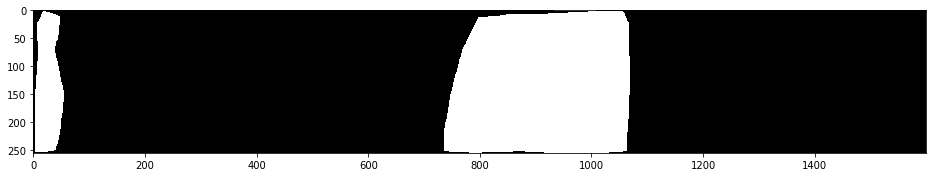

In [75]:
plt.figure(figsize=(16, 10))
plt.imshow(rle2mask(channels_data[images_names_list[i]][ich], 256, 1600), 'gray')
plt.show()

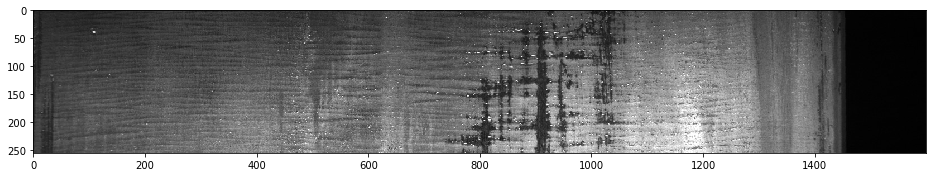

In [76]:
plt.figure(figsize=(16, 10))
plt.imshow(
    cv2.imread(os.path.join(train_images_folder, images_names_list[i]), 0),
    'gray'
)
plt.show()

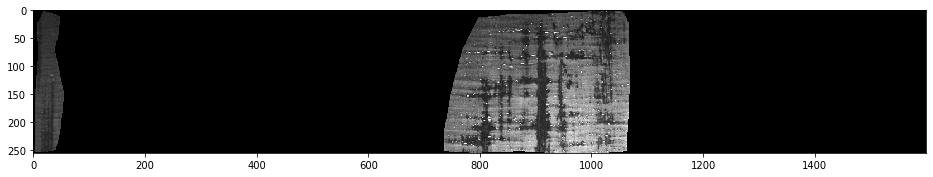

In [77]:
plt.figure(figsize=(16, 10))
plt.imshow(
    cv2.imread(os.path.join(train_images_folder, images_names_list[i]), 0) *\
    (rle2mask(channels_data[images_names_list[i]][ich], 256, 1600) // 255), 
    'gray'
)
plt.show()

In [17]:
def boxes_by_mask(mask):
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return [cv2.boundingRect(contour) for contour in contours]

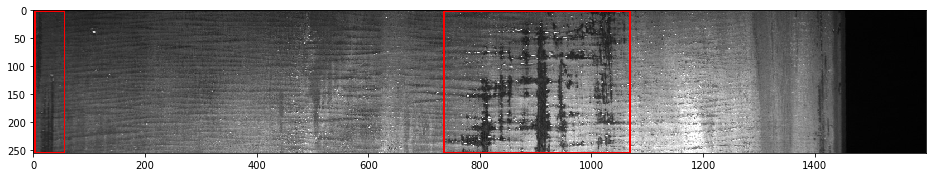

In [78]:
img = cv2.imread(os.path.join(train_images_folder, images_names_list[i]), 1)

for rect in boxes_by_mask(rle2mask(channels_data[images_names_list[i]][ich], 256, 1600)):
    x, y, w, h = rect
    
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
plt.figure(figsize=(16, 10))
plt.imshow(img, 'gray')
plt.show()